*   Prasang Baria (202052332)



## Dataset


*   The dataset contains the batters sold in the IPL auction.
*   The dataset contains the bowler sold in the IPL auction.


*   The dataset also has uncapped players who will play the IPL for the first time.
*   The dataset contains keepers and all-rounders sold in the auction.





**The data contains information** like matches played,runs,wickets,average,strike rate,catches,runouts,stumps etc.

**Based on these data points**-we will try to create the best 11 from these set of players from the current campaign.

We can summarize our analysis in the following steps:


1.   Extract and loading the data
2.   Cleaning the data and removing the noise.
3.   Analyse the data on different parameters.
4.   visualizing the important statistical foldings.





In [ ]:
#import the neccessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
# https://www.kaggle.com/datasets/gautammittal3/ipl-2022-players-data
df=pd.read_csv("IPLData.csv")

In [ ]:
df.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Player Name', 'Team', 'Nationality', 'Player_Type', 'Capped',
       'Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches',
       'Run_outs', 'Stumps'],
      dtype='object')

In [ ]:
# checking the number of null values using the isna().sum() method
df.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [ ]:
# data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

## Hypothesis Testing (t-Test)
To perform hypothesis testing on this IPL data, we need to first define a hypothesis to test. Let's say we want to test if there is a significant difference in the average runs scored by Indian batters and overseas batters in the IPL.

Here, **the null hypothesis would be that there is no significant difference in the average runs scored by Indian batters and overseas batters in the IPL**, and the alternative hypothesis would be that there is a significant difference.

The t-statistic tells us the magnitude of the difference between the means of the two groups, while the p-value tells us the probability of observing such a difference if the null hypothesis were true.

If the p-value is less than our chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant difference in the average runs scored by Indian and overseas batters in the IPL. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

We can use a t-test to test this hypothesis. Here's the Python code to perform the t-test:


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the IPL data into a Pandas DataFrame
ipl_data = pd.read_csv('IPLData.csv')
ipl_data=ipl_data.fillna(0)

# Filter the DataFrame to only include batters
batters_data = ipl_data[ipl_data['Player_Type'] == 'Batter']

# Separate the Indian and overseas batters into two different DataFrames
indian_batters = batters_data[batters_data['Nationality'] == 'Indian']
overseas_batters = batters_data[batters_data['Nationality'] != 'Indian']

# Perform the t-test
t_stat, p_val = ttest_ind(indian_batters['Runs'], overseas_batters['Runs'], equal_var=False)

# Print the results
print("T-statistic: ", t_stat)
print("P-value: ", p_val)


T-statistic:  1.22024930371063
P-value:  0.23078676541111726


Based on the results of the t-test, the t-statistic is 1.2202 and the p-value is 0.2308.

Since the p-value (0.2308) is greater than the chosen significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to suggest that there is a significant difference in the average runs scored by Indian batters and overseas batters in the IPL.

Therefore, based on this analysis, we cannot conclude that there is a significant difference in the average runs scored by Indian batters and overseas batters in the IPL.

## Hypothesis Testing (ANOVA)
ANOVA (Analysis of Variance) is a statistical method used to test the hypothesis that the means of two or more groups are equal. ANOVA is used to compare the means of two or more groups and determine whether any of the group means are statistically significantly different from each other.

Here's how to perform hypothesis testing using ANOVA:

1. State the null and alternative hypotheses: **The null hypothesis is that there is no significant difference between the means of the groups being compared.** The alternative hypothesis is that there is a significant difference between the means of the groups being compared.

2. Select a significance level: Choose a significance level (alpha) to determine the level of risk you are willing to accept of rejecting the null hypothesis when it is true. Typically, a significance level of 0.05 is used.

3. Collect data: Collect data from each group being compared. Ensure that the data is normally distributed and that the variances are equal across the groups.

4. Calculate the test statistic: Calculate the F-statistic, which is the ratio of the variance between the groups to the variance within the groups. The F-statistic is calculated by dividing the mean square between groups by the mean square within groups.

5. Determine the p-value: The p-value is the probability of obtaining a test statistic as extreme as the one calculated, assuming the null hypothesis is true. The p-value is calculated based on the F-distribution and the degrees of freedom.

6. Compare the p-value to the significance level: If the p-value is less than the significance level, reject the null hypothesis and conclude that there is a significant difference between the means of the groups being compared. If the p-value is greater than the significance level, fail to reject the null hypothesis and conclude that there is no significant difference between the means of the groups being compared.

In summary, ANOVA is a useful tool for testing the hypothesis that there is a significant difference between the means of two or more groups. By following the steps above, you can perform hypothesis testing using ANOVA in Python and draw conclusions based on the results.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv("IPLData.csv")
data=data.fillna(0)
# Group the data by team and calculate the mean batting average for each team
team_groups = data.groupby("Team")
team_avgs = team_groups["Average"].mean()

# Perform ANOVA
f_stat, p_value = f_oneway(*[group["Average"] for name, group in team_groups])

print("F-statistic:", f_stat)
print("p-value:", p_value)



F-statistic: 1.076670106256334
p-value: 0.3805323474826121


Getting an F-statistic of 1.076670106256334 and a p-value of 0.3805323474826121 from performing ANOVA on the IPL dataset, then it means that there is no significant difference in the batting average of the players across different teams. This is because the p-value is greater than the significance level of 0.05, which means we fail to reject the null hypothesis that there is no significant difference in the batting average of the players across different teams. In other words, the data does not provide sufficient evidence to suggest that there is a significant difference in the batting average of the players across different teams in the IPL dataset.

## Permutation Testing
One other hypothesis test that we could perform on this dataset using a permutation test is to test whether there is a significant difference between the average number of wickets taken by Indian and foreign bowlers.

To perform this test, we can follow a similar procedure as before:

1. Define the null hypothesis: **There is no difference between the average number of wickets taken by Indian and foreign bowlers in the dataset.**

2. Define the test statistic: The test statistic will be the difference in means between the Indian and foreign bowlers in terms of the number of wickets taken.

3. Generate the permutation samples: We can generate permutation samples by randomly shuffling the "Nationality" column and computing the difference in means between the two groups for each permutation.

4. Compute the p-value: The p-value is the proportion of permutation samples that have a difference in means as extreme or more extreme than the actual difference in means between the Indian and foreign bowlers in the dataset.


In [ ]:
import pandas as pd
import numpy as np

# Load the IPL data
data = pd.read_csv('IPLData.csv')

# Extract the number of wickets taken by each bowler
wickets = data[['Nationality', 'Wickets']].dropna()

# Compute the observed difference in means
indian_wickets = wickets[wickets['Nationality'] == 'Indian']['Wickets']
foreign_wickets = wickets[wickets['Nationality'] != 'Indian']['Wickets']
observed_diff = np.mean(indian_wickets) - np.mean(foreign_wickets)

# Generate permutation samples
n_permutations = 1000
permutation_diffs = np.zeros(n_permutations)
for i in range(n_permutations):
    combined = pd.concat([indian_wickets, foreign_wickets])
    shuffled = combined.sample(frac=1).reset_index(drop=True)
    shuffled_indian_wickets = shuffled[:len(indian_wickets)]
    shuffled_foreign_wickets = shuffled[len(foreign_wickets):]
    permutation_diffs[i] = np.mean(shuffled_indian_wickets) - np.mean(shuffled_foreign_wickets)

# Compute the p-value
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

print('Observed difference:', observed_diff)
print('p-value:', p_value)


Observed difference: -0.7688888888888883
p-value: 0.866


The observed difference between the average number of wickets taken by Indian and foreign bowlers is -0.7689, which means that Indian bowlers take slightly fewer wickets on average than foreign bowlers. However, the p-value of the permutation test is 0.898, which is much greater than the usual significance level of 0.05. This means that there is not enough evidence to reject the null hypothesis that there is no difference between the average number of wickets taken by Indian and foreign bowlers in the dataset.

Therefore, we cannot conclude that there is a significant difference between the two groups in terms of the number of wickets taken. It is possible that any observed differences are due to chance or sampling variability.

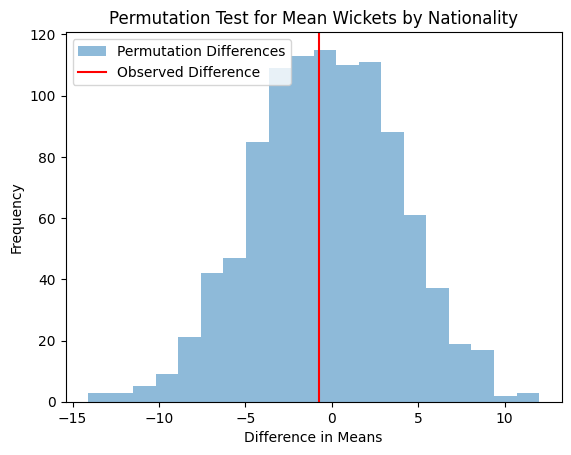

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of permutation differences
plt.hist(permutation_diffs, bins=20, alpha=0.5, label='Permutation Differences')

# Plot vertical line at observed difference
plt.axvline(observed_diff, color='red', label='Observed Difference')

# Add labels and legend
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Permutation Test for Mean Wickets by Nationality')
plt.legend()

# Show plot
plt.show()

## Cleaning the data
In the above data,the players can be easily segregated based on following parameters.

1.   Capped-Batters,Bowlers,Allrounders,Wicket Keepers
2.   Uncapped-Batters,Bowlers,Allrounders,Wicket Keepers

The uncapped players are plaing the IPL for the first time or releavanat data isn't available therefore we have used domestic T20 performances and T20 international performances.



In [ ]:
# segregating Data - Capped Batters
batters=df.loc[(df["Player_Type"]=="Batter")]

batters_new=batters.loc[(batters['Capped']==1)]

Capped_batters=batters_new[['Player Name','Team','Nationality','Matches_Played','Runs',
                            'Average','Strike_Rate']]

In [ ]:
Capped_batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [ ]:
# Segregating data - Capped Bowlers
bowlers=df.loc[(df['Player_Type']=='Bowler ')]
bowlers_new=bowlers.loc[(bowlers['Capped']==1)]

Capped_Bowlers=bowlers_new[['Player Name','Team','Nationality','Matches_Played','Wickets',
                            'Bowling_average','Bowling_Strike_Rate','Economy']]

In [ ]:
# Segregating data - Capped Keepers
Keepers=df.loc[df['Player_Type']=='Keeper']

Keepers_new=Keepers.loc[(Keepers['Capped']==1)]

Capped_Keepers=Keepers_new[['Player Name','Team','Nationality',
                            'Matches_Played','Runs','Average','Strike_Rate',
                            'Catches','Run_outs','Stumps']]

In [ ]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [ ]:
# Segregating Data - Capped Allrounders
Allrounders=df.loc[df['Player_Type']=='Allrounder']

Allrounders_new=Allrounders.loc[(Allrounders['Capped']==1)]

Capped_Allrounders=Allrounders_new[['Player Name',
                                    'Team','Nationality',
                                    'Matches_Played','Runs','Average','Strike_Rate',
                                    'Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [ ]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [ ]:
# Cleaning the daata by making the null or NAN values 0.
Capped_batters=Capped_batters.fillna(0)
Capped_Bowlers=Capped_Bowlers.fillna(0)
Capped_Allrounders=Capped_Allrounders.fillna(0)
Capped_Keepers=Capped_Keepers.fillna(0)

In [ ]:
# checking null values in the data
print(Capped_batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Allrounders.isna().sum())
print(Capped_Keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Bowling_Strike_Rate    0
Economy                0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


## Initial Analysis
In this section we will analyze data for batters,bowlers,keepers and all rounders.

In [ ]:
# finding batters whose average is more than 32
top_batters=Capped_batters.loc[(Capped_batters["Average"]>=32)]

# Sorting the data in descendign order-with respect to each parameter
top_batters_average=top_batters.sort_values('Average',ascending=False)
top_batters_strike_rate=top_batters.sort_values('Strike_Rate',ascending=False)
top_batters_runs=top_batters.sort_values('Runs',ascending=False)
top_batters_matches=top_batters.sort_values('Matches_Played',ascending=False)


In [ ]:
top_batters_average.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95


In [ ]:
top_batters_strike_rate.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27


In [ ]:
top_batters_runs.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09


In [ ]:
top_batters_matches.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38


From Our analysis,if we rank from 0-10,the top three batters that will come while analysing each of the above data are:

1.   David Warner
2.   KL Rahul
3.   Virat Kohli



In [ ]:
# Analysing the bowlers data
# here we have narrowed our analysis based on the bowling averages of the players to be less than 24
top_bowlers=Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"]<=24.0)]

top_bowlers_average=top_bowlers.sort_values('Bowling_average')
top_bowlers_strike_rate=top_bowlers.sort_values('Bowling_Strike_Rate')
top_bowlers_wickets=top_bowlers.sort_values('Wickets',ascending=False)
top_bowlers_economy=top_bowlers.sort_values('Economy')
top_bowlers_matches=top_bowlers.sort_values('Matches_Played',ascending=False)


In [ ]:
top_bowlers_average.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Bowling_Strike_Rate,Economy
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,0.00,10.50
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,0.00,11.40
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,0.00,8.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,8.67,10.04
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,12.96,8.30


In [ ]:
top_bowlers_strike_rate.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Bowling_Strike_Rate,Economy
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,0.00,10.50
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,0.00,11.40
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,0.00,8.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,8.67,10.04
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,12.96,8.30


In [ ]:
top_bowlers_wickets.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Bowling_Strike_Rate,Economy
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,17.61,7.59
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,18.63,7.42
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,15.00,8.21
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,17.48,7.52
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,20.50,6.82


In [ ]:
top_bowlers_economy.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Bowling_Strike_Rate,Economy
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,20.50,6.82
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,18.63,7.42
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,17.48,7.52
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,17.61,7.59
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,16.12,7.65


In [ ]:
top_bowlers_matches.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Bowling_Strike_Rate,Economy
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,17.61,7.59
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,18.63,7.42
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,15.00,8.21
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,17.48,7.52
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,20.50,6.82


From the aboe analysis,if we rank down the parameters from 1-10.the top bowling options are as follows:


1.   Kagiso Rabada
2.   Jasprit Bumrah
3.   Yuzvendra Chahal
4.   Nathan coulter-Nile



In [ ]:
# Analysing the All-Rounder Data
# we have narrowed down our analysis by further segregating the allrounders based on strike rate equal to or more than 140.0
top_allrounders=Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"]>=140.0)]

top_allrounders_average=top_allrounders.sort_values('Average',ascending=False)
top_allrounders_strike_rate=top_allrounders.sort_values('Strike_Rate',ascending=False)
top_allrounders_runs=top_allrounders.sort_values('Runs',ascending=False)
top_allrounders_matches=top_allrounders.sort_values('Matches_Played',ascending=False)
top_allrounders_bowling_average=top_allrounders.sort_values('Bowling_average')
top_allrounders_bowling_strike_rate=top_allrounders.sort_values('Bowling_Strike_Rate')
top_allrounders_wickets=top_allrounders.sort_values('Wickets',ascending=False)
top_allrounders_economy=top_allrounders.sort_values('Economy')
top_allrounders_matches=top_allrounders.sort_values('Matches_Played',ascending=False)

In [ ]:
top_allrounders_average.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [ ]:
top_allrounders_strike_rate.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69


In [ ]:
top_allrounders_runs.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83


In [ ]:
top_allrounders_bowling_average.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [ ]:
top_allrounders_wickets.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69


From the above analysis,if we rank down the allrounders from 1-10 on various parameters.The top allrounder options are as follows:


1.   Andre Russell
2.   Sunil Narine
3.   Hardik Pandya
4.   Jofra Archer



In [ ]:
# Analysing the Keepers data
# We have narrowed our analysis down to keepers averaging more than 25.0
top_keepers=Capped_Keepers.loc[(Capped_Keepers["Average"]>=25.0)]
# Sorting the data in descending order with respect to each parameter
top_keepers_average=top_keepers.sort_values('Average',ascending=False)
top_keepers_strike_rate=top_keepers.sort_values('Strike_Rate',ascending=False)
top_keepers_runs=top_keepers.sort_values('Runs',ascending=False)
top_keepers_matches=top_keepers.sort_values('Matches_Played',ascending=False)
top_keepers_catches=top_keepers.sort_values('Catches',ascending=False)
top_keepers_runouts=top_keepers.sort_values('Run_outs',ascending=False)
top_keepers_stumps=top_keepers.sort_values('Stumps',ascending=False)

In [ ]:
top_keepers_average.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [ ]:
top_keepers_strike_rate.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0


In [ ]:
top_keepers_runs.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0


In [ ]:
top_keepers_matches.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0


In [ ]:
top_keepers_catches.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0


In [ ]:
top_keepers_runouts.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0


In [ ]:
top_keepers_stumps.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0


If we rank the keepers in order of 1-10 on the above parameters.The top 3 keepers will be
1. MS Dhoni
2. Dinesh Kartik
3. Rishab Pant

## Visualization For Enhanced Analysis
Now the initial analysis has been done on the segregated data.You can create a few visual representation of the same to get better analaysis of the data.

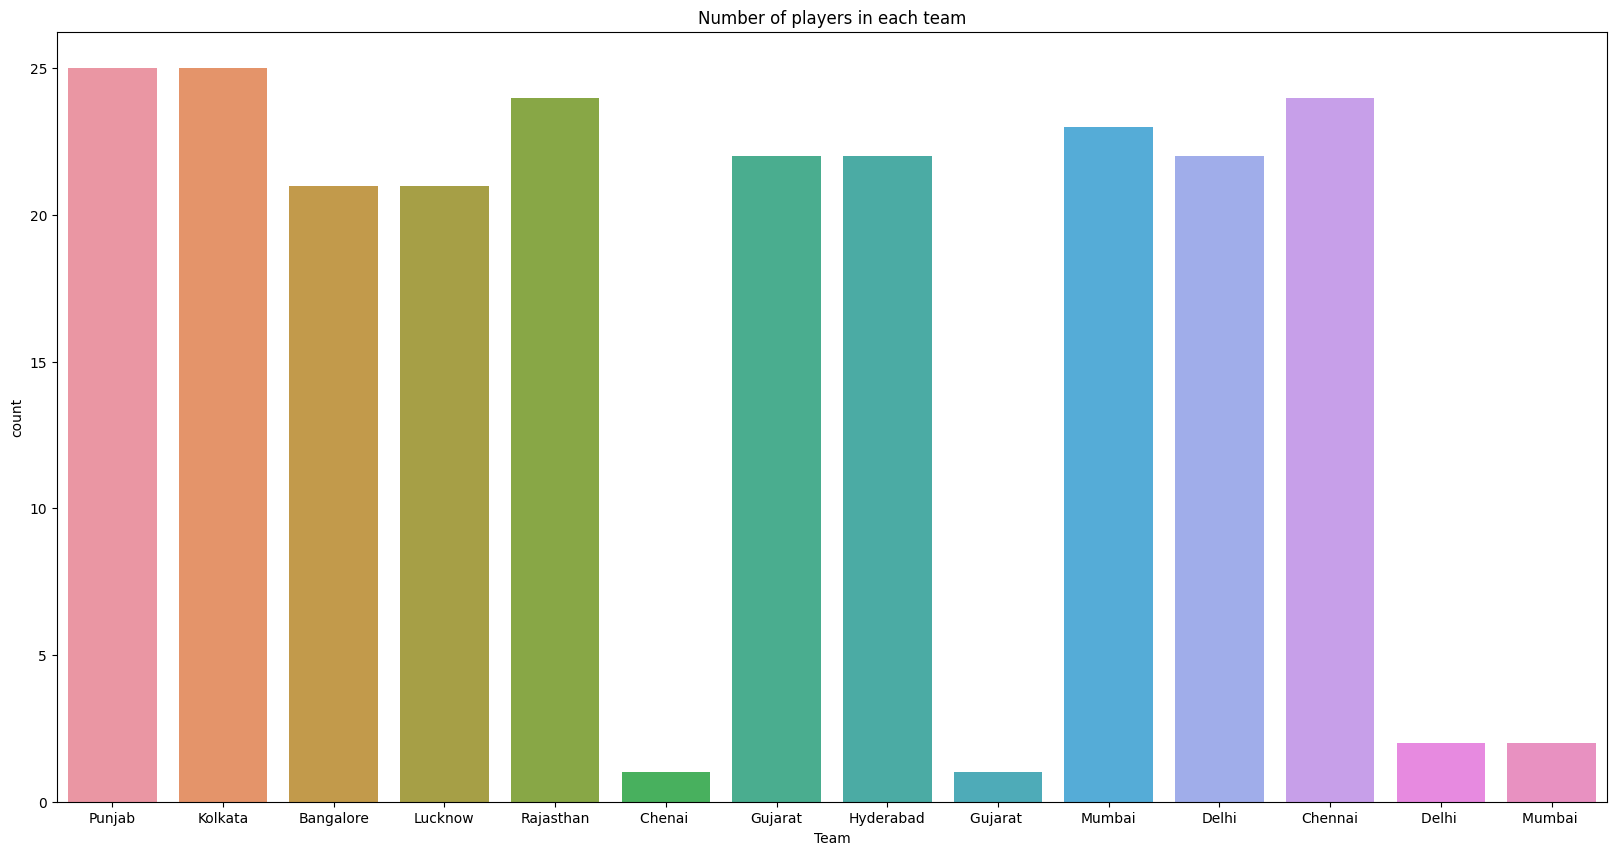

In [ ]:
# Bar plot showing the number of players in each team:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x='Team', data=df)
plt.title('Number of players in each team')
plt.show()

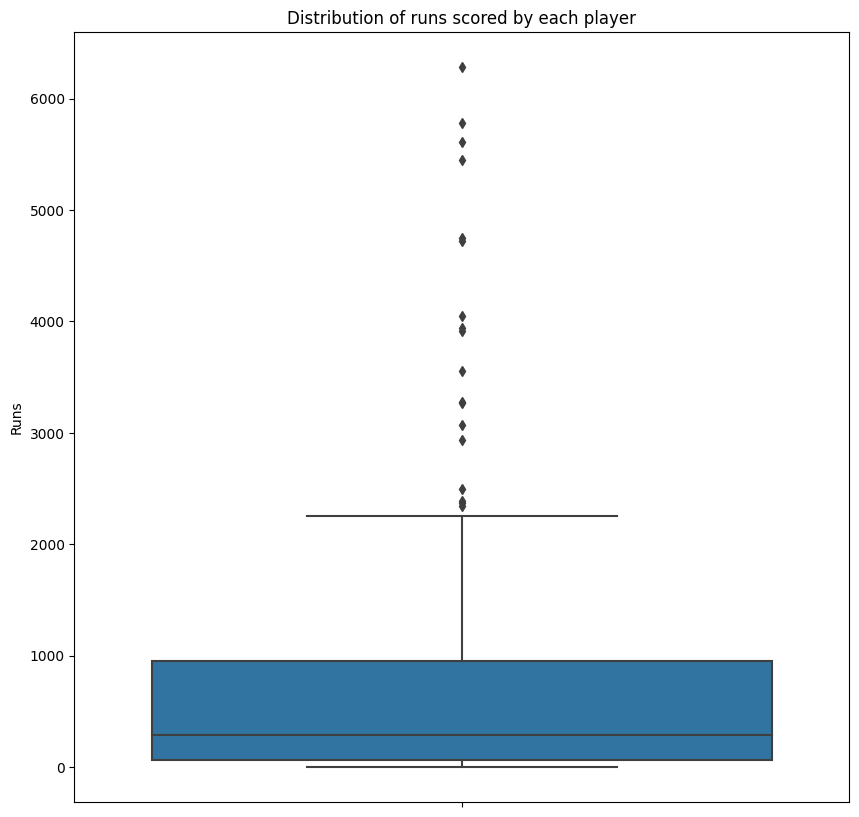

In [ ]:

plt.figure(figsize=(10,10))
sns.boxplot(y='Runs', data=df)
plt.title('Distribution of runs scored by each player')
plt.show()

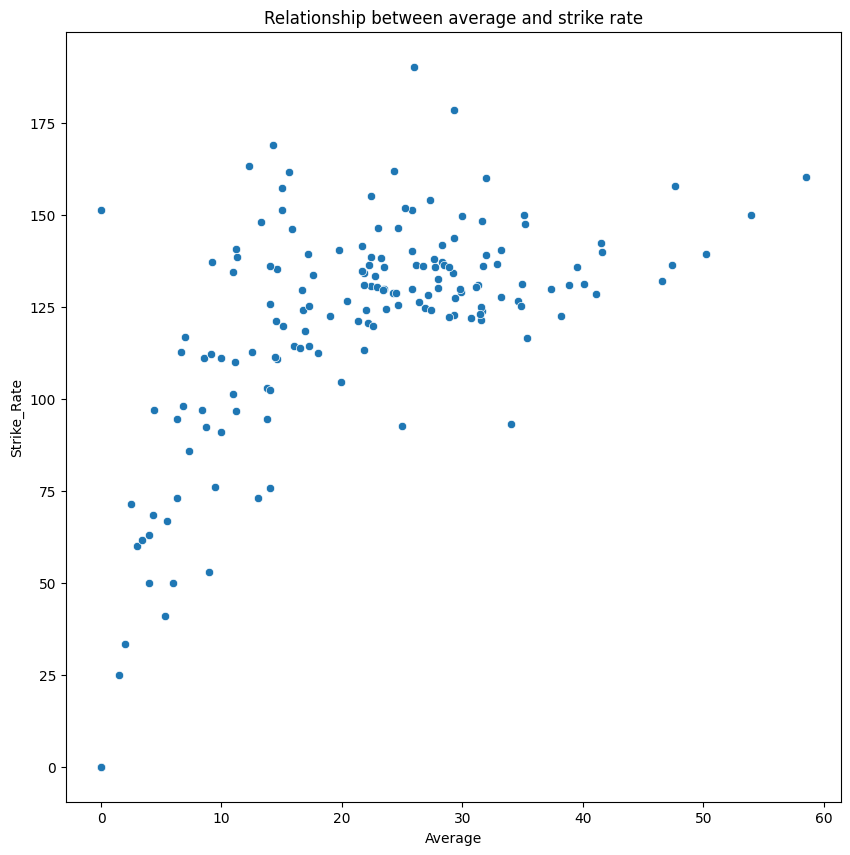

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Average', y='Strike_Rate', data=df)
plt.title('Relationship between average and strike rate')
plt.show()

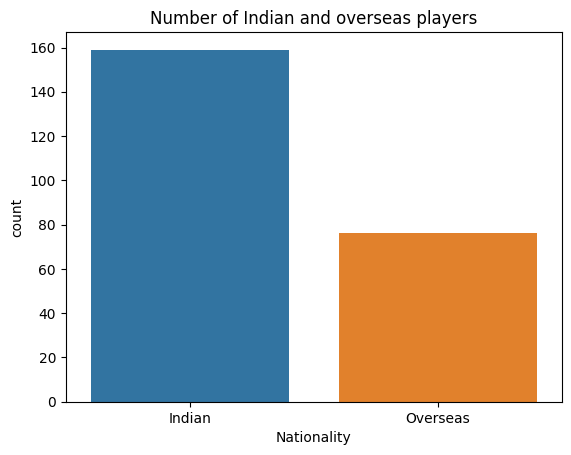

In [ ]:
sns.countplot(x='Nationality', data=df)
plt.title('Number of Indian and overseas players')
plt.show()

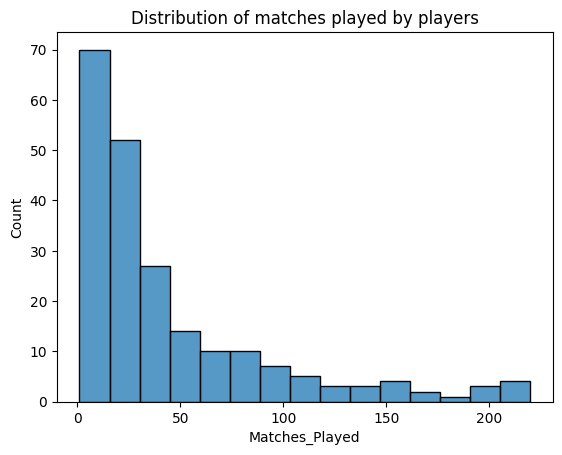

In [ ]:
sns.histplot(x='Matches_Played', data=df)
plt.title('Distribution of matches played by players')
plt.show()

<ipython-input-71-01a6dfa04705>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


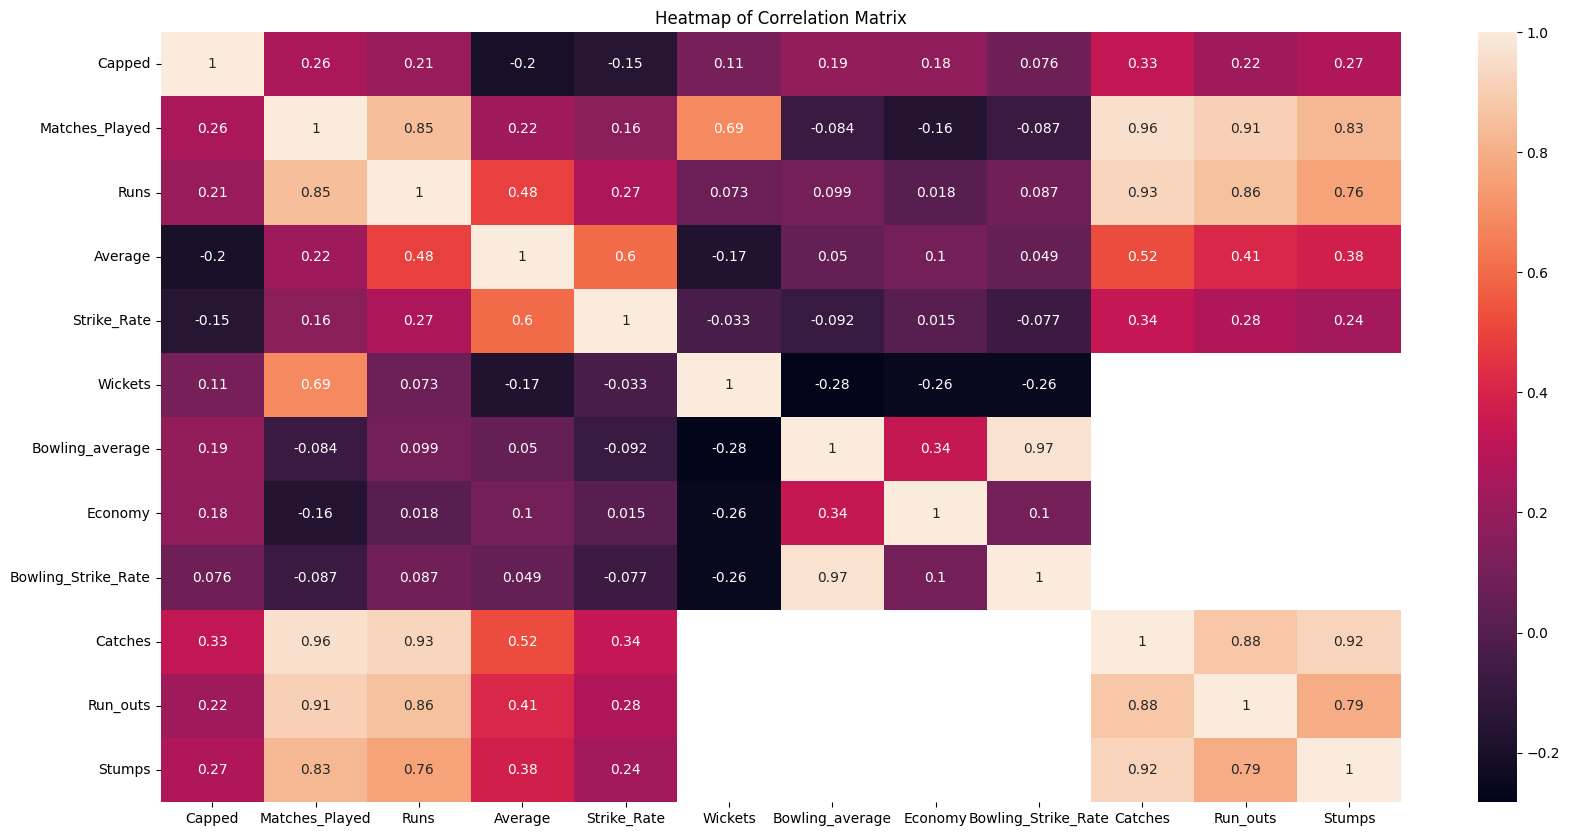

In [ ]:
# A heatmap can be used to visualize the correlation between different numerical variables. 
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Visualizing Top Batters Data

In [ ]:
top_batters.columns

Index(['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Runs',
       'Average', 'Strike_Rate'],
      dtype='object')

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

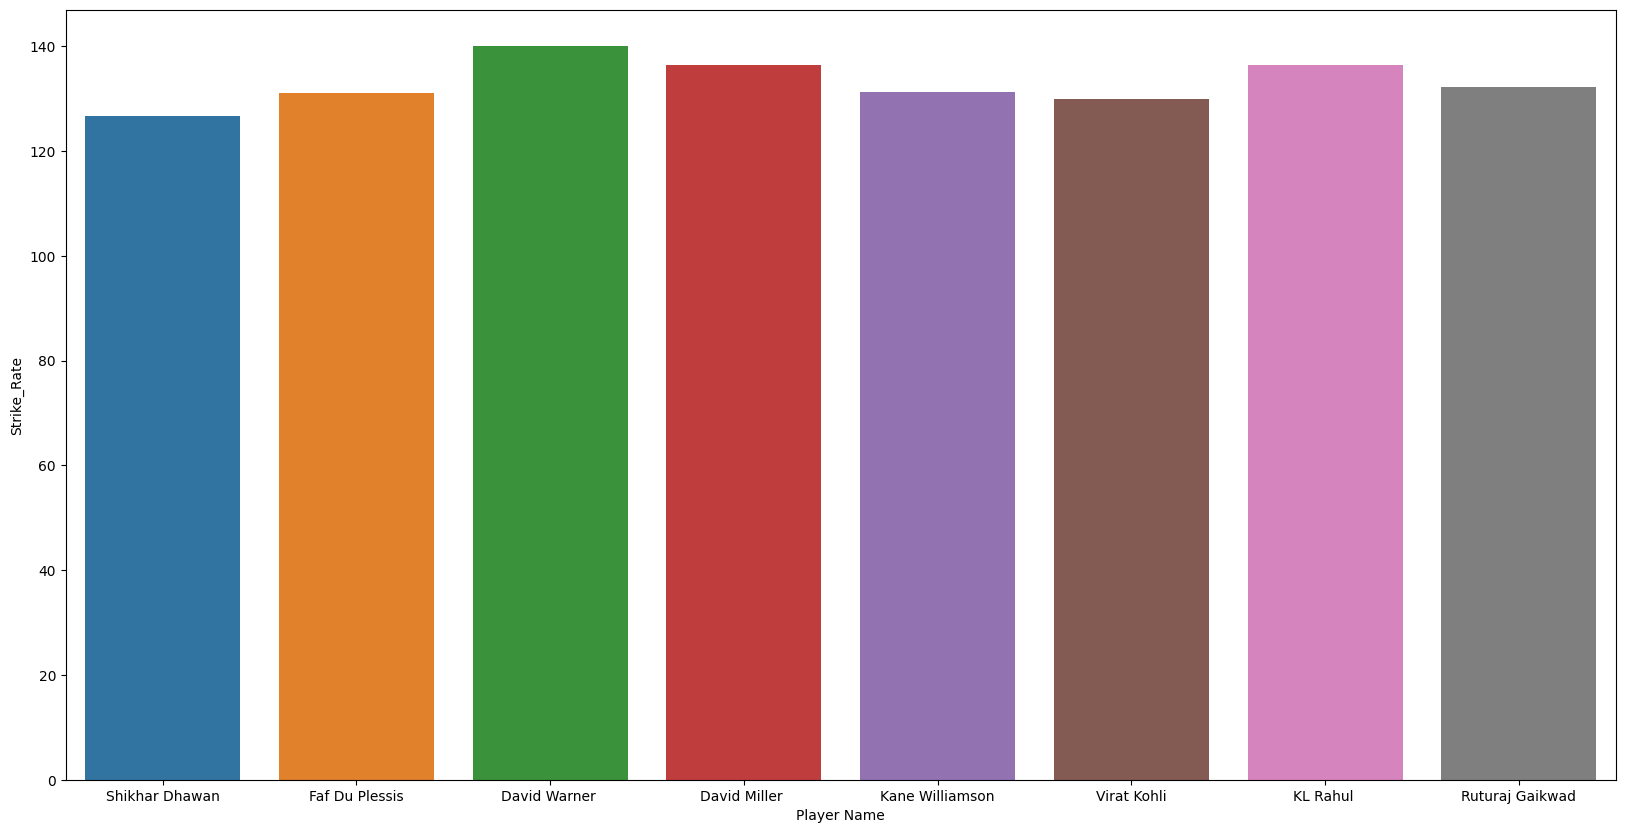

In [ ]:
# Visualization of Batters Data
# the plot shows each of the top batters strike rata
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batters)

<Axes: xlabel='Player Name', ylabel='Runs'>

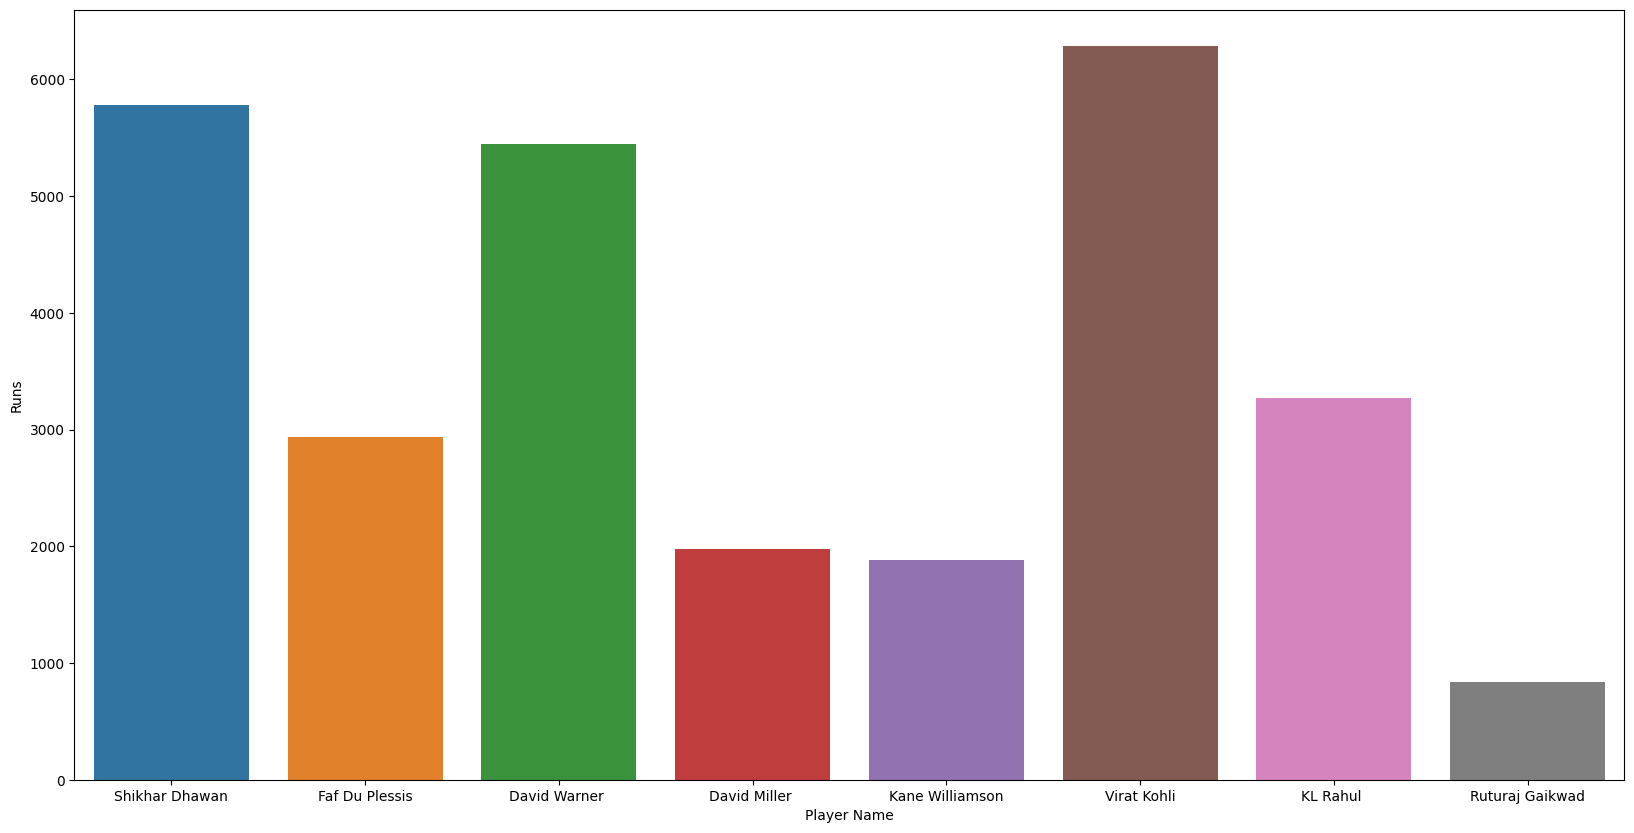

In [ ]:
# this plot shows the top batters runs.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_batters)

<Axes: xlabel='Player Name', ylabel='Average'>

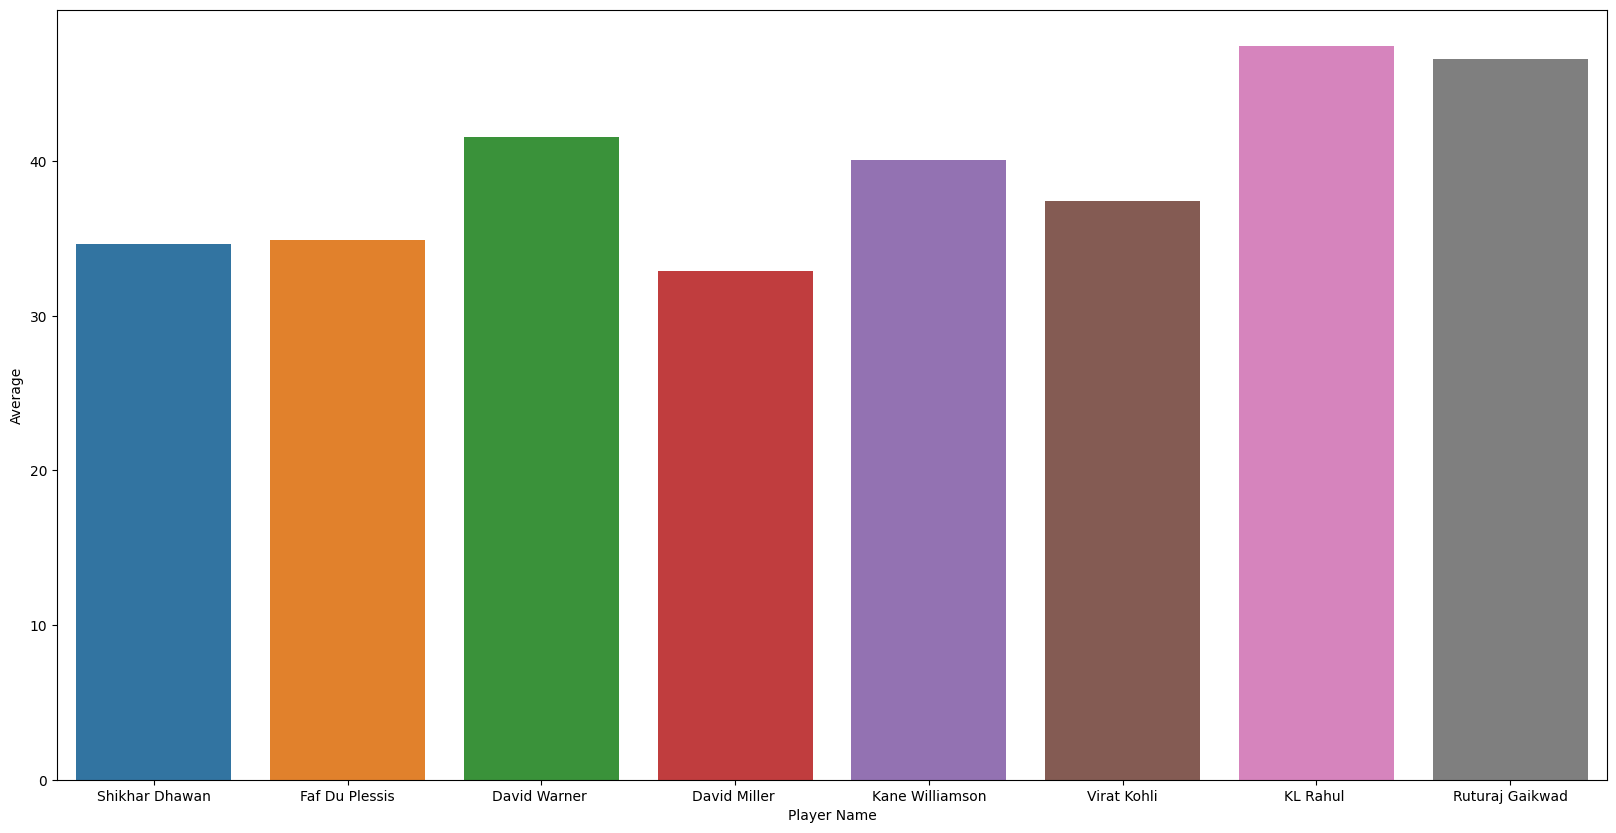

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_batters)

## Visualizing Top Bowlers Data

In [ ]:
top_bowlers.columns

Index(['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Wickets',
       'Bowling_average', 'Bowling_Strike_Rate', 'Economy'],
      dtype='object')

<Axes: xlabel='Player Name', ylabel='Wickets'>

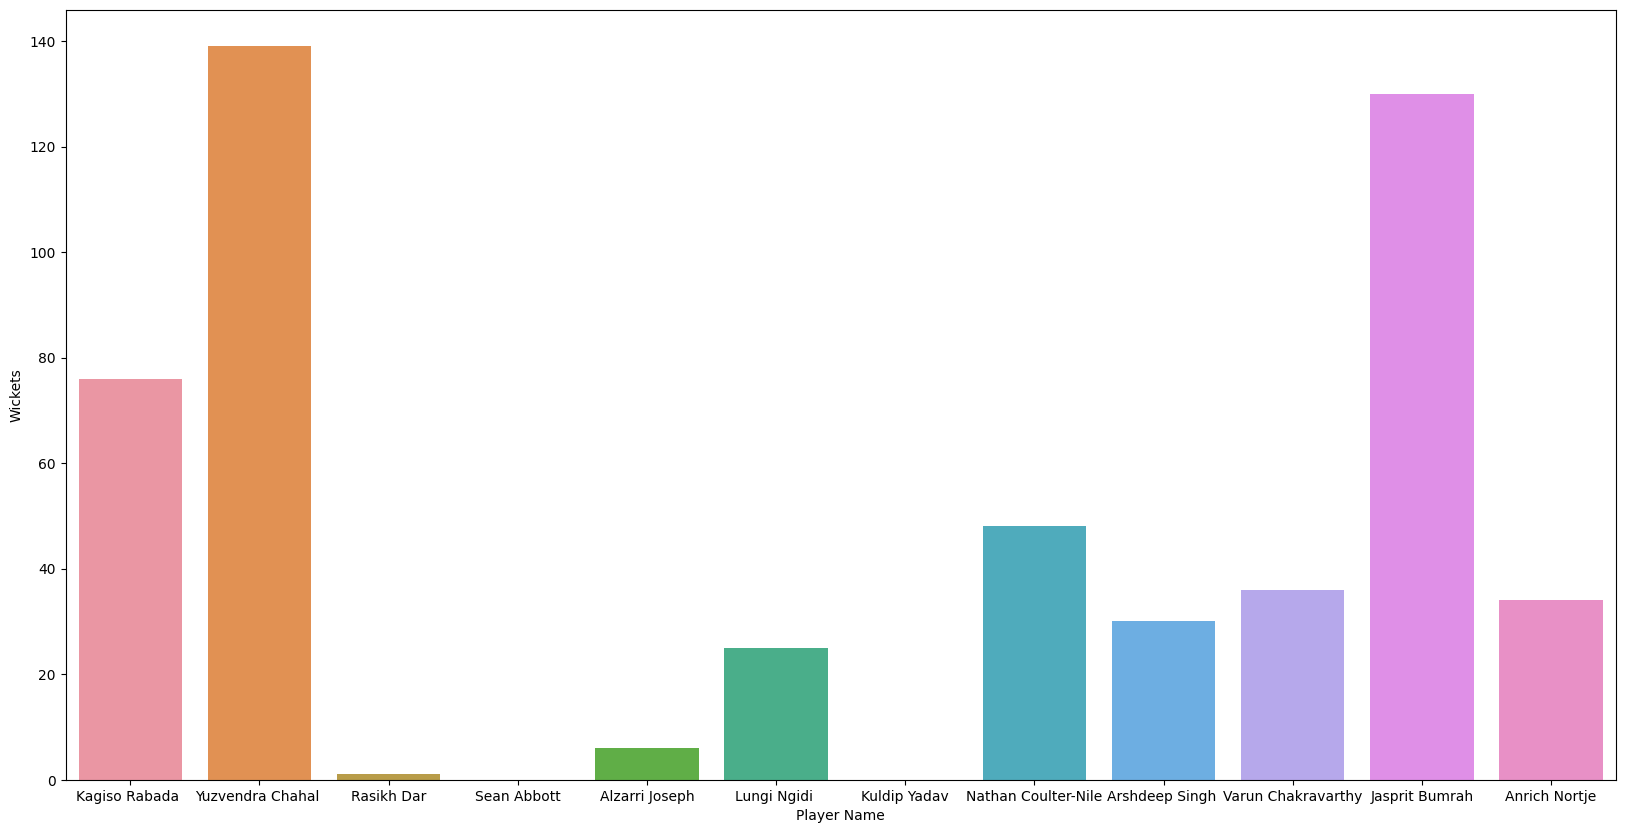

In [ ]:
# Visualizing the bowlers data
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

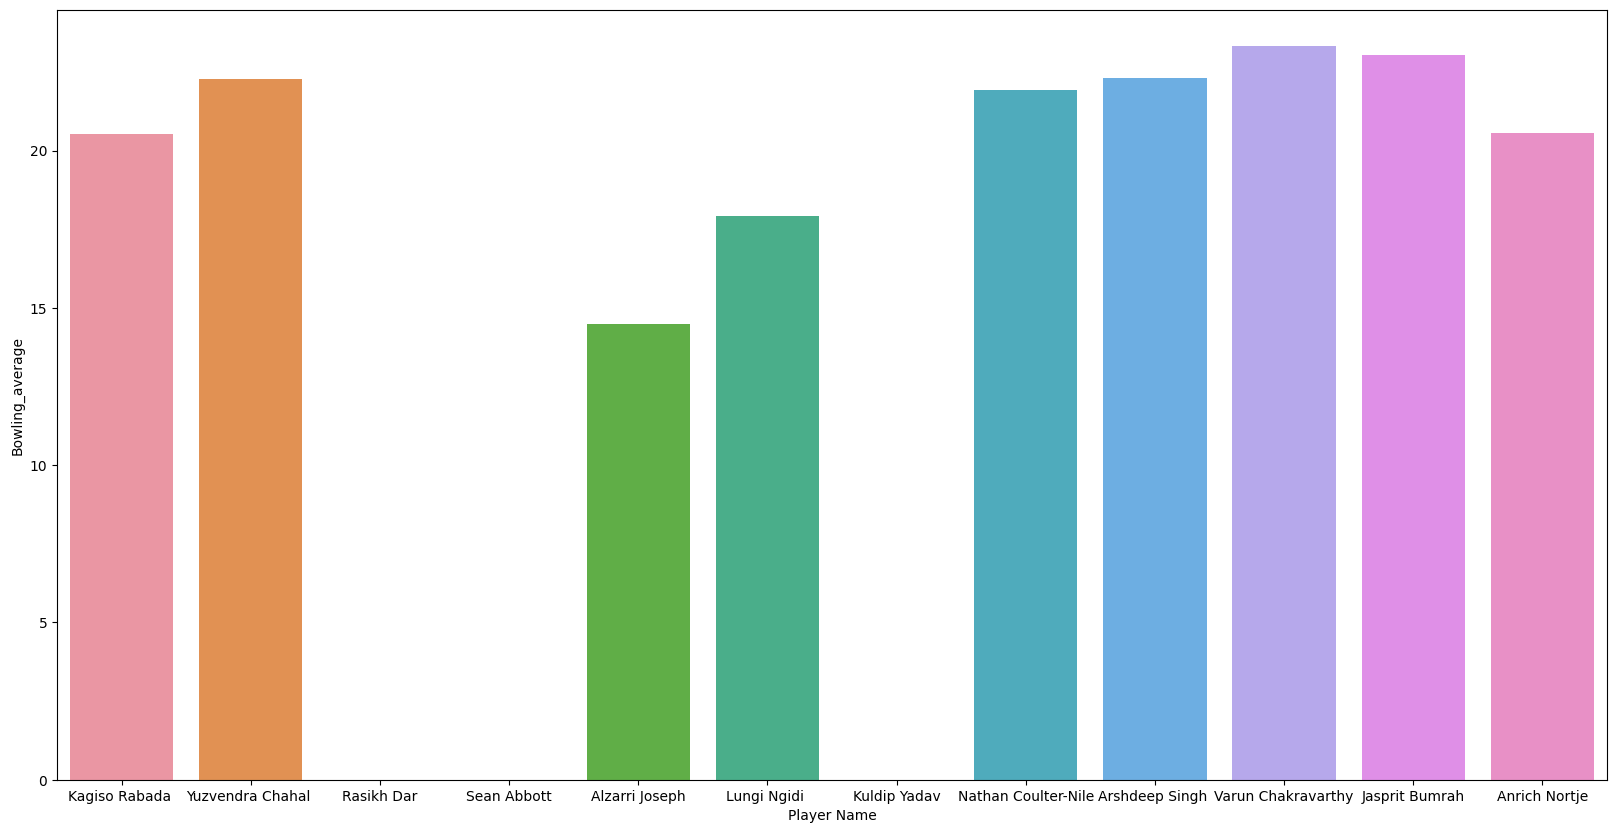

In [ ]:

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

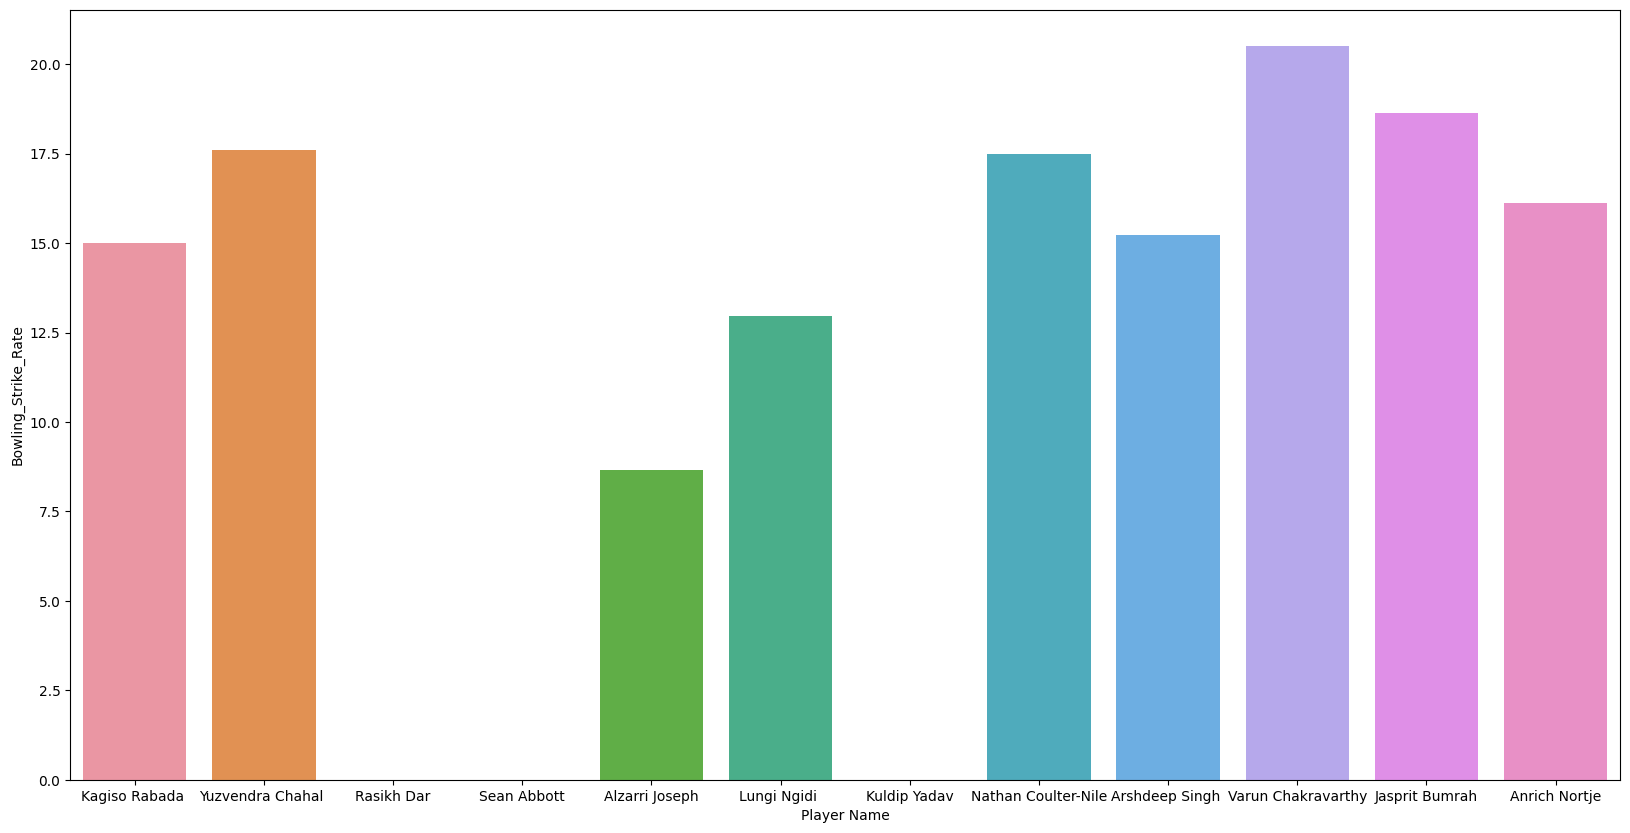

In [ ]:

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Economy'>

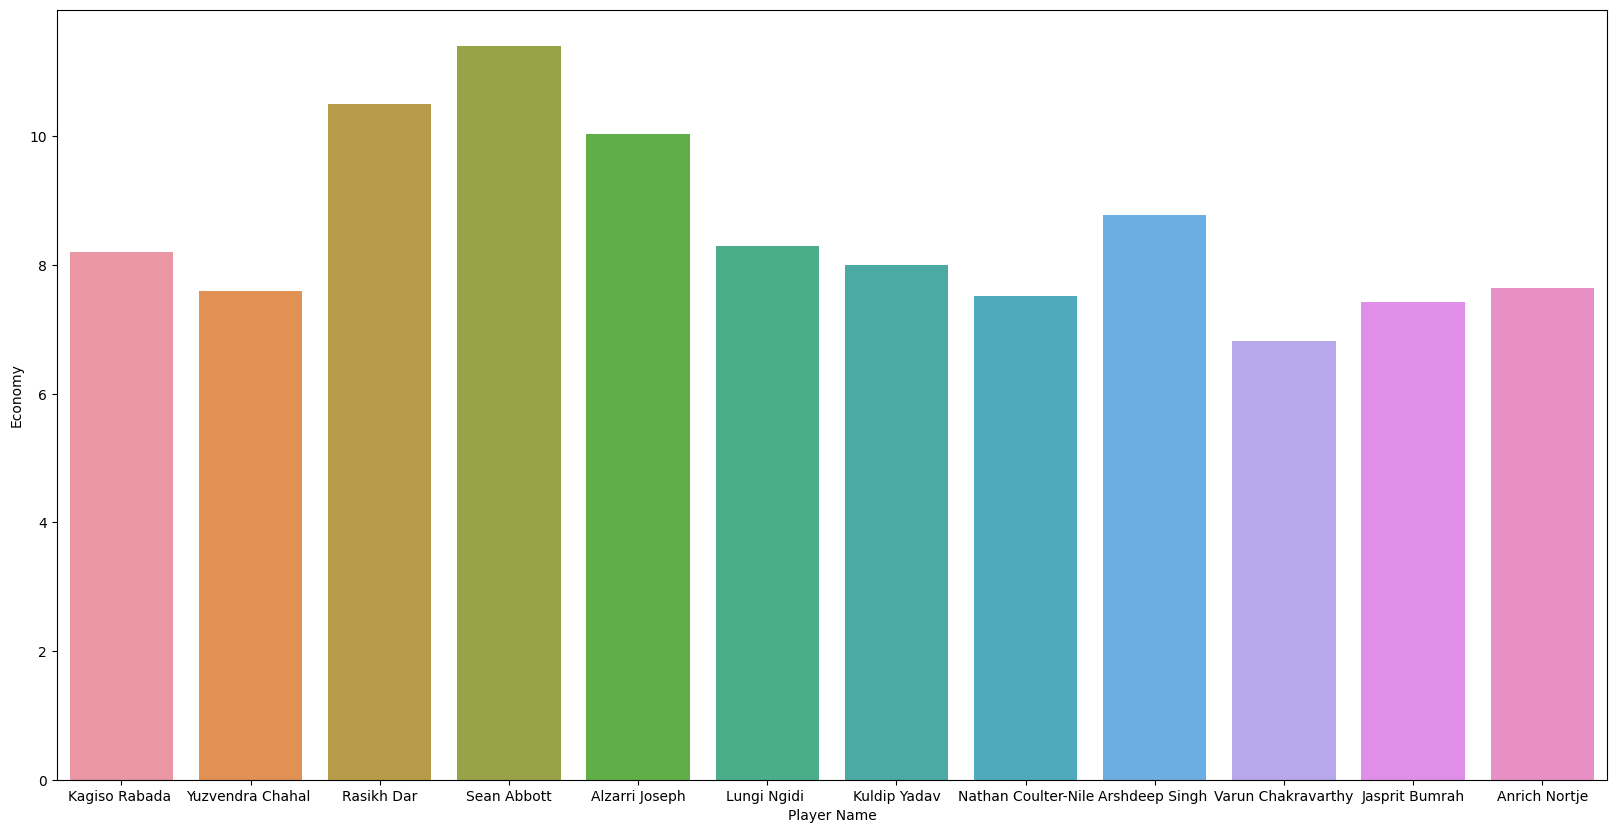

In [ ]:

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_bowlers)

## Visualizing Top Allrounders Data

In [ ]:
top_allrounders.columns

Index(['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Runs',
       'Average', 'Strike_Rate', 'Wickets', 'Bowling_average', 'Economy',
       'Bowling_Strike_Rate'],
      dtype='object')

<Axes: xlabel='Player Name', ylabel='Runs'>

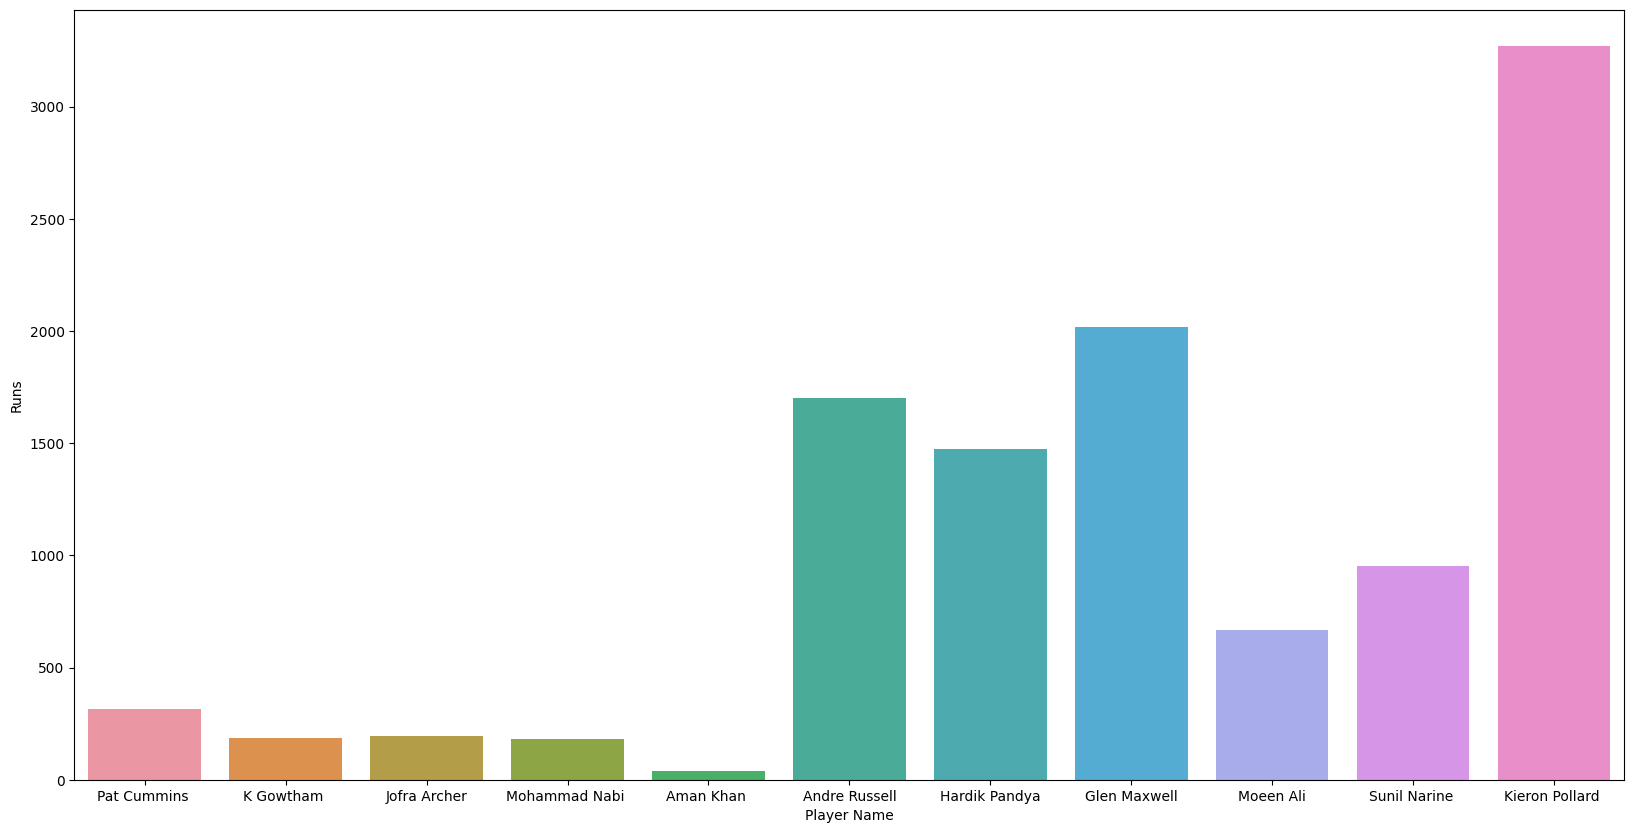

In [ ]:
#Visualizing the all rounder data
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Average'>

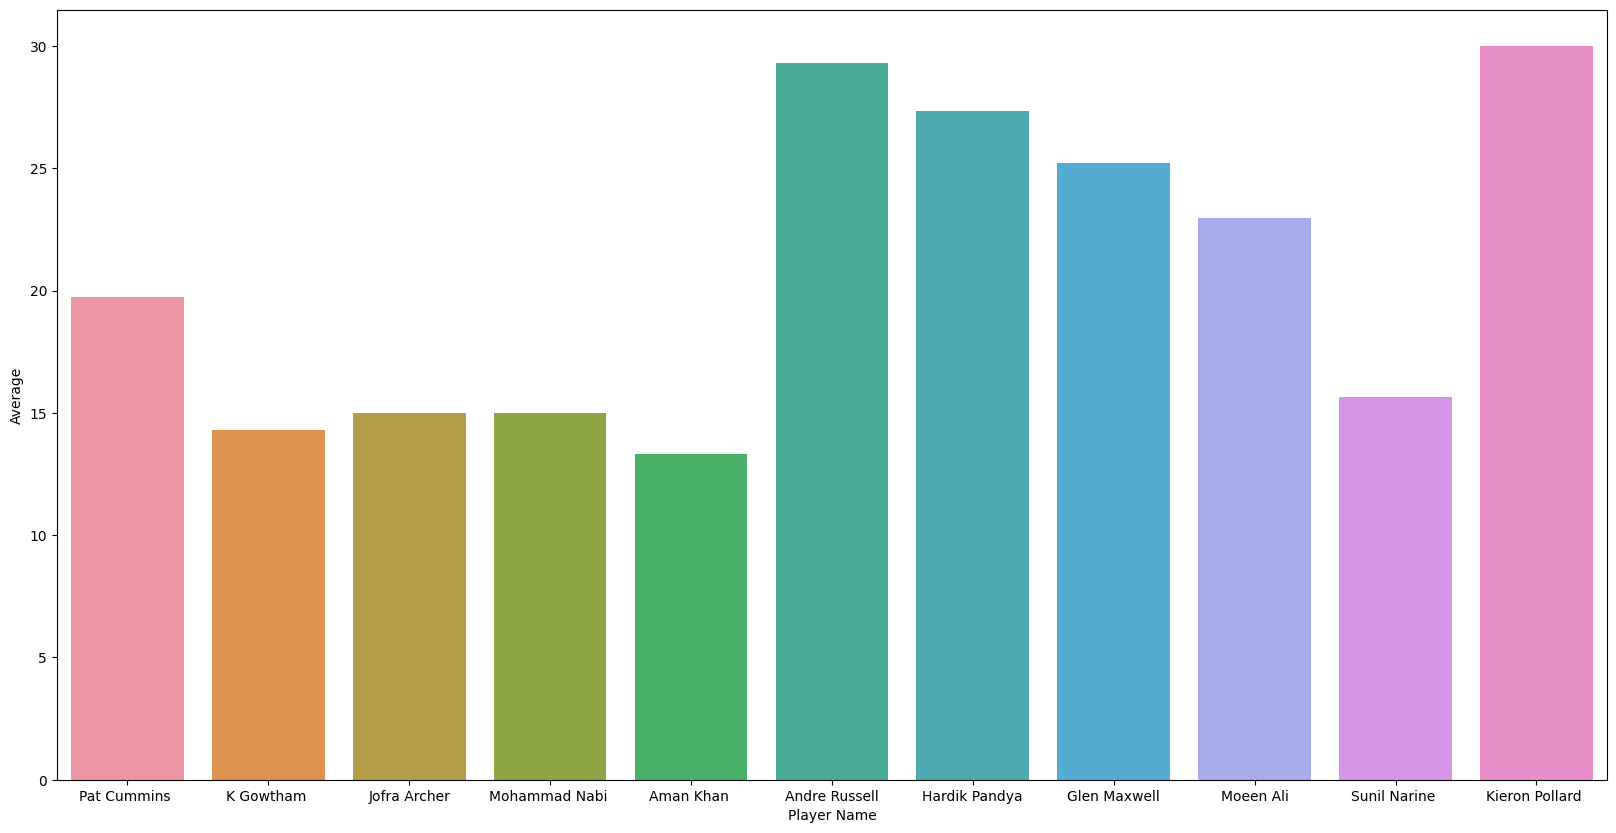

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Wickets'>

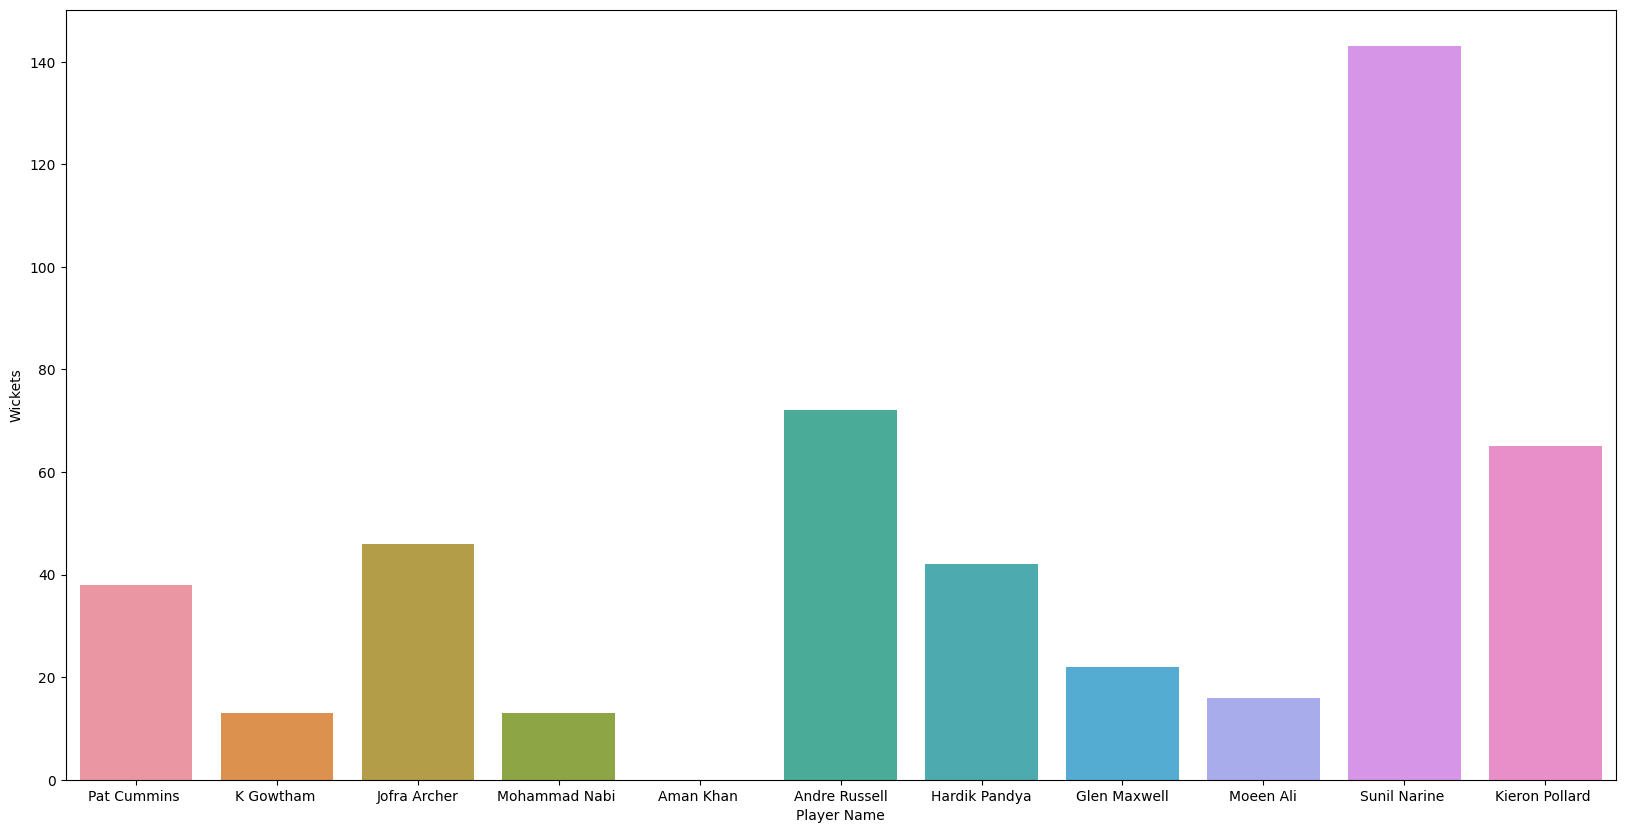

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

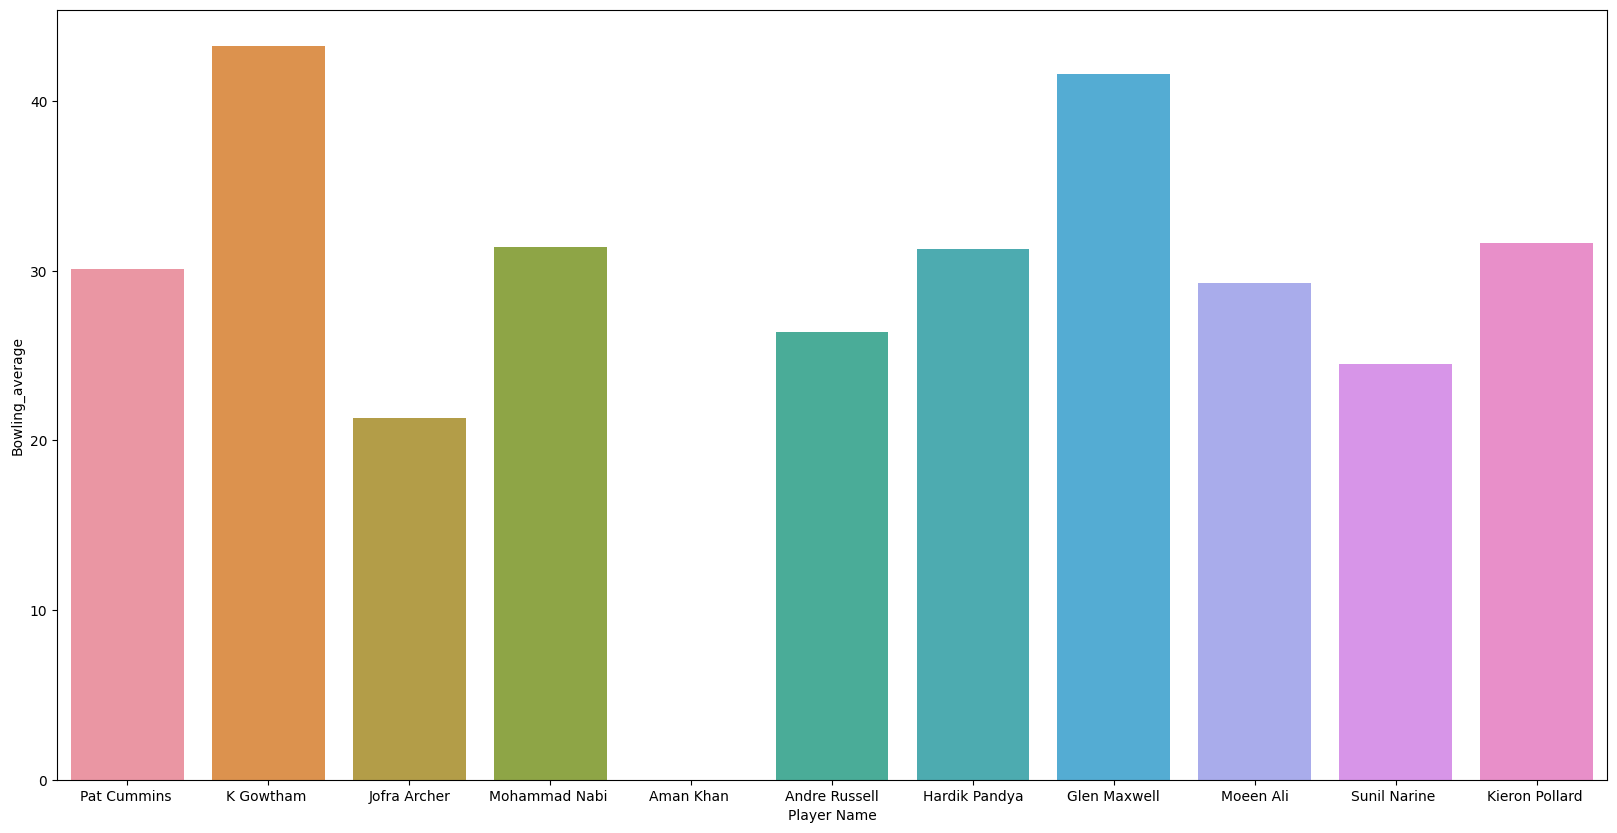

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Economy'>

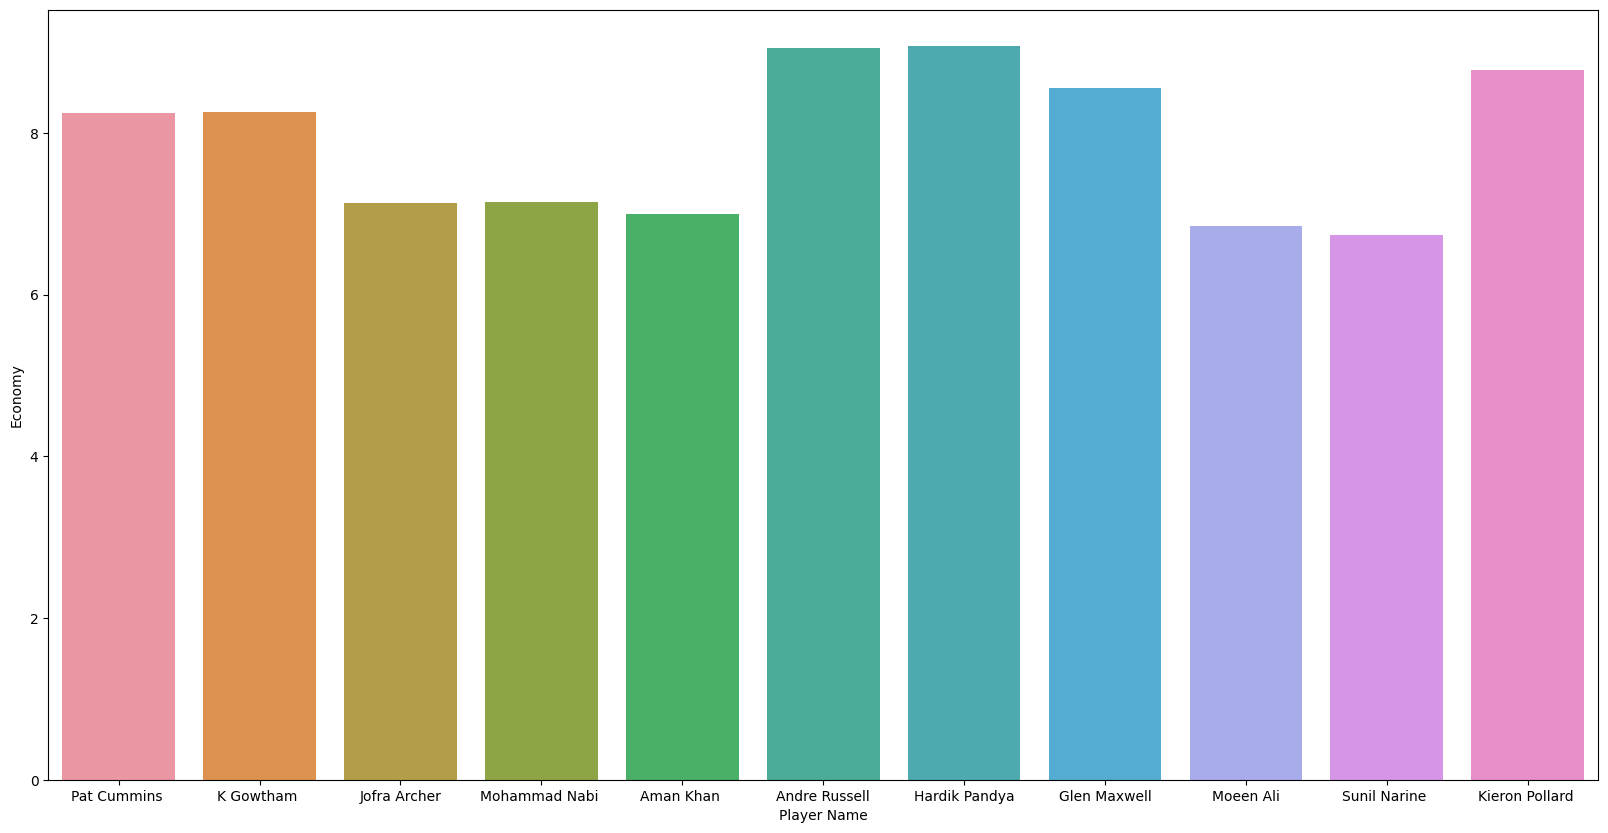

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_allrounders)

## Forming our Best 11 for the Campaign based on the above analysis


1. We will consider the number of players from each category that the t20 world cup wining and the last year's IPL winning team played in the Final matches.

2. Te Australia squad consisted of 3 batters,4 Bowlers, 3 All rounders and one Wicket Keeper.

3. Te Chennai squad consisted of 4 batters,3 Bowlers, 3 All rounders and one Wicket Keeper.

4. For our final analysis we will consider the ration of players in the best 11 as follows:

  * 3 Batters
  * 3 Allrounders
  * 4 Bowlers 
  * 1 Wicket Keeper





<Axes: title={'center': 'Average'}>

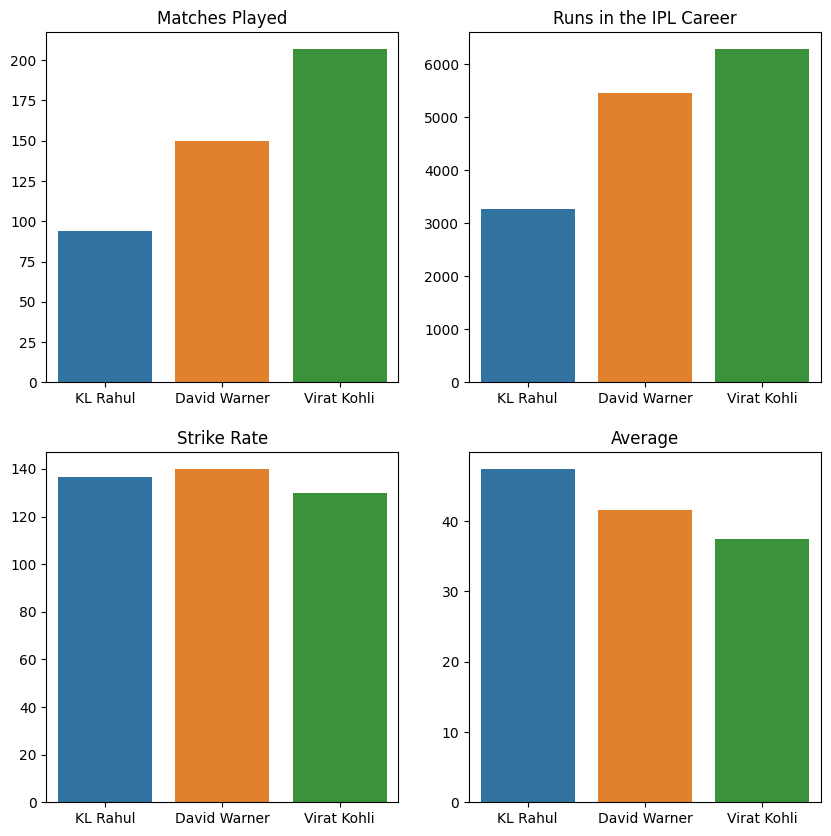

In [ ]:
#Batters for the Final 11 - KL Rahul, Virat Kohli, David Warner
#here, we are storing the values of each player in a separate dataframe to use for displaying using the barplot.
top_batters.reset_index(drop=True)
matches_value=[top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
runs_value=[top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
strike_rate_values=[top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
average_values=[top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
labels=['KL Rahul','David Warner','Virat Kohli']

fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
sns.barplot(x=labels,y=matches_value,ax=axes[0][0])
sns.barplot(x=labels,y=runs_value,ax=axes[0][1])
sns.barplot(x=labels,y=strike_rate_values,ax=axes[1][0])
sns.barplot(x=labels,y=average_values,ax=axes[1][1])

<Axes: title={'center': 'Economy'}>

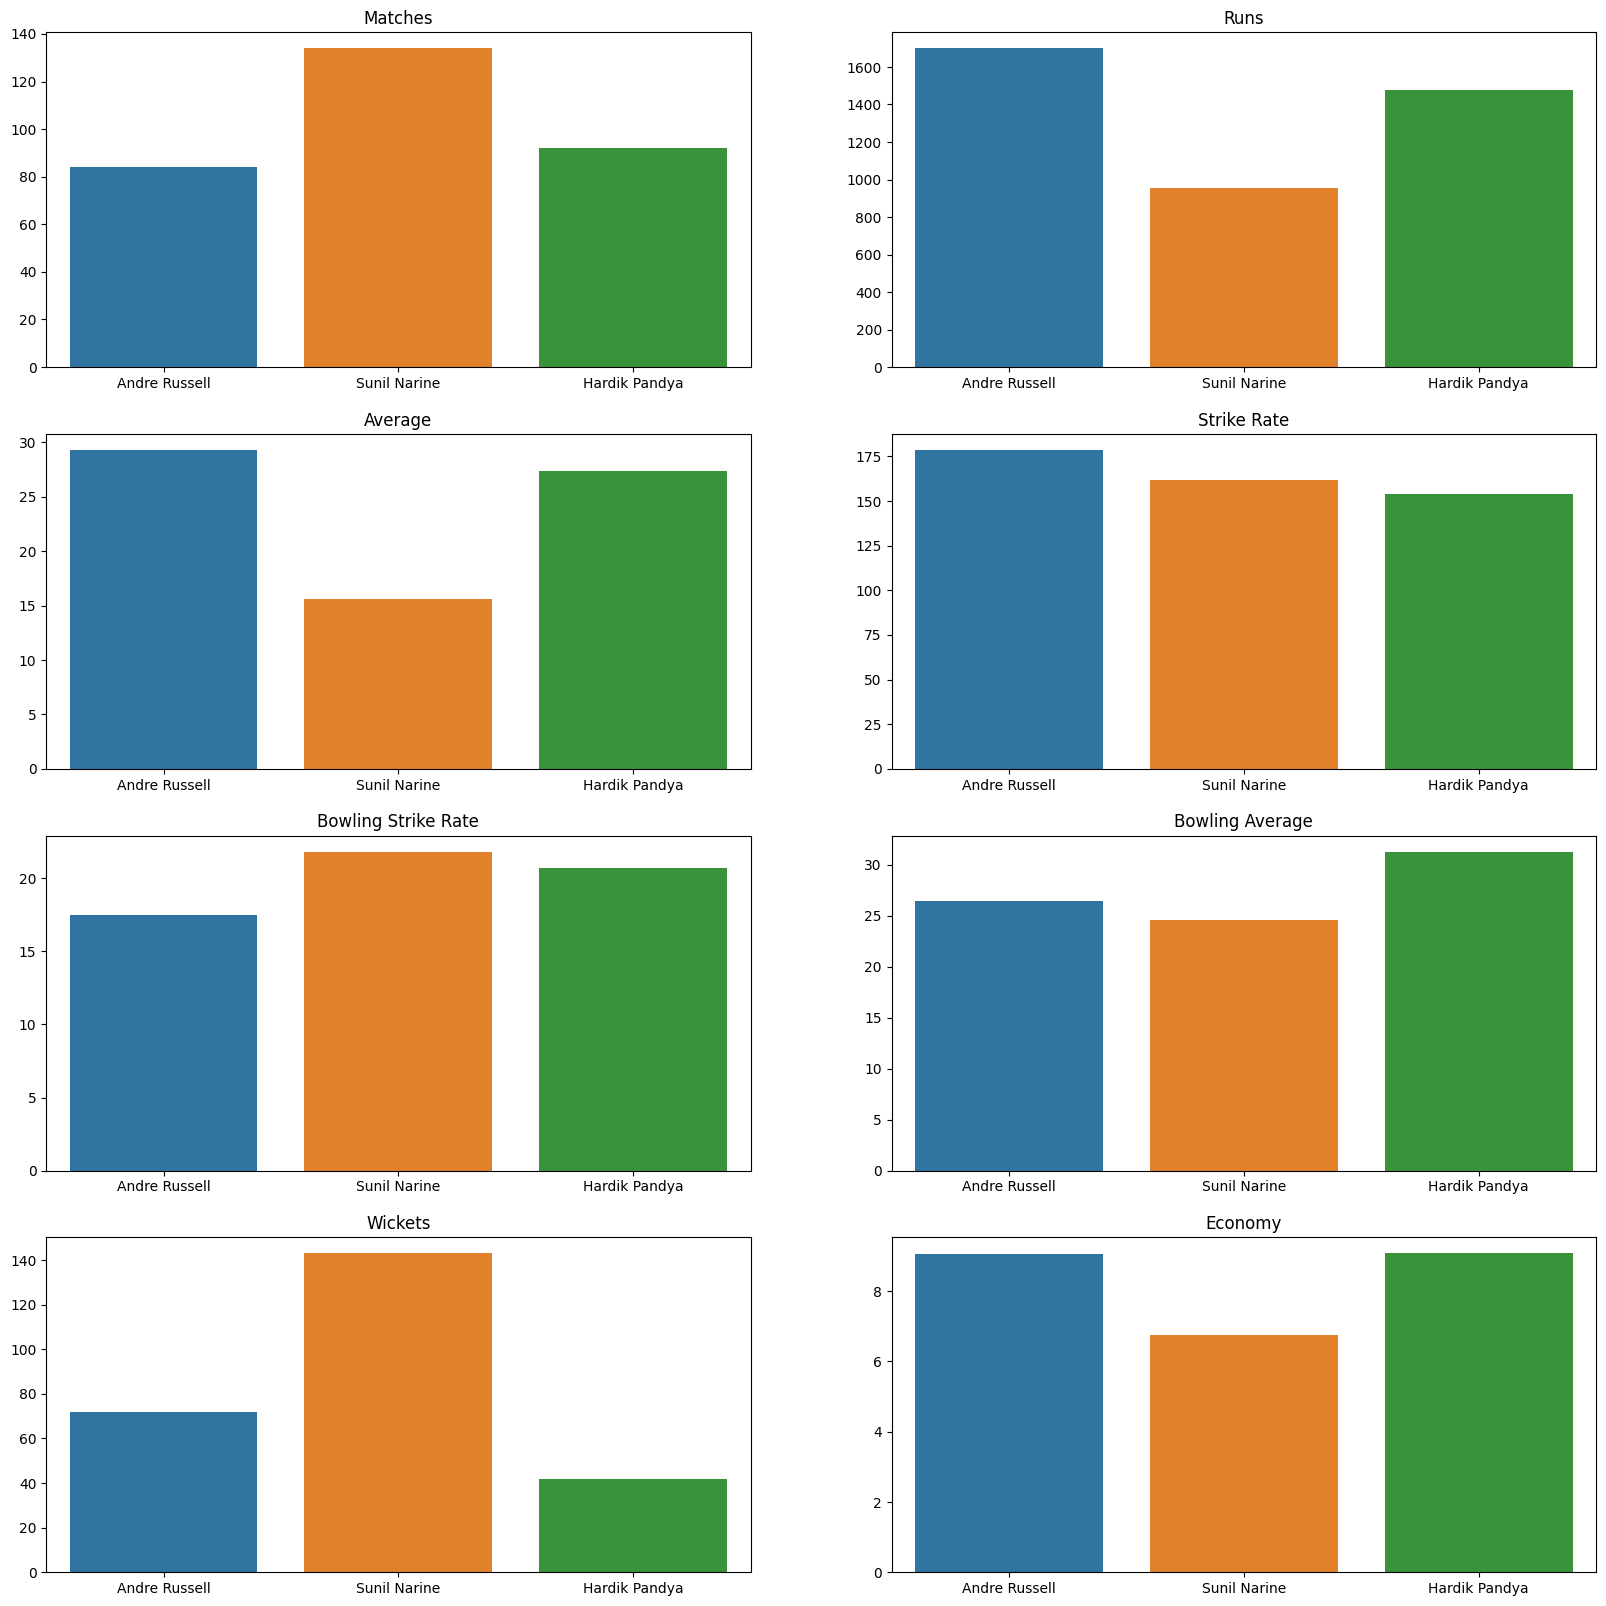

In [ ]:
# All rounders for the final 11- Andre Russell,Sunil Narine,Hardik Pandya
top_allrounders.reset_index(drop=True)
matches_values=[top_allrounders.iloc[5]['Matches_Played'],top_allrounders.iloc[9]['Matches_Played'],top_allrounders.iloc[6]['Matches_Played']]
runs_values=[top_allrounders.iloc[5]['Runs'],top_allrounders.iloc[9]['Runs'],top_allrounders.iloc[6]['Runs']]
average_values=[top_allrounders.iloc[5]['Average'],top_allrounders.iloc[9]['Average'],top_allrounders.iloc[6]['Average']]
strike_rate_values=[top_allrounders.iloc[5]['Strike_Rate'],top_allrounders.iloc[9]['Strike_Rate'],top_allrounders.iloc[6]['Strike_Rate']]
bowling_strike_rate_values=[top_allrounders.iloc[5]['Bowling_Strike_Rate'],top_allrounders.iloc[9]['Bowling_Strike_Rate'],top_allrounders.iloc[6]['Bowling_Strike_Rate']]
bowling_average_values=[top_allrounders.iloc[5]['Bowling_average'],top_allrounders.iloc[9]['Bowling_average'],top_allrounders.iloc[6]['Bowling_average']]
wickets_values=[top_allrounders.iloc[5]['Wickets'],top_allrounders.iloc[9]['Wickets'],top_allrounders.iloc[6]['Wickets']]
economy_values=[top_allrounders.iloc[5]['Economy'],top_allrounders.iloc[9]['Economy'],top_allrounders.iloc[6]['Economy']]

labels=['Andre Russell','Sunil Narine','Hardik Pandya']

fig,axes=plt.subplots(4,2,figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=labels,y=runs_values,ax=axes[0][1])
sns.barplot(x=labels,y=average_values,ax=axes[1][0])
sns.barplot(x=labels,y=strike_rate_values,ax=axes[1][1])
sns.barplot(x=labels,y=bowling_strike_rate_values,ax=axes[2][0])
sns.barplot(x=labels,y=bowling_average_values,ax=axes[2][1])
sns.barplot(x=labels,y=wickets_values,ax=axes[3][0])
sns.barplot(x=labels,y=economy_values,ax=axes[3][1])


In [ ]:
# Wicket Keeper for the final 11- MS Dhoni


<Axes: title={'center': 'Economy'}>

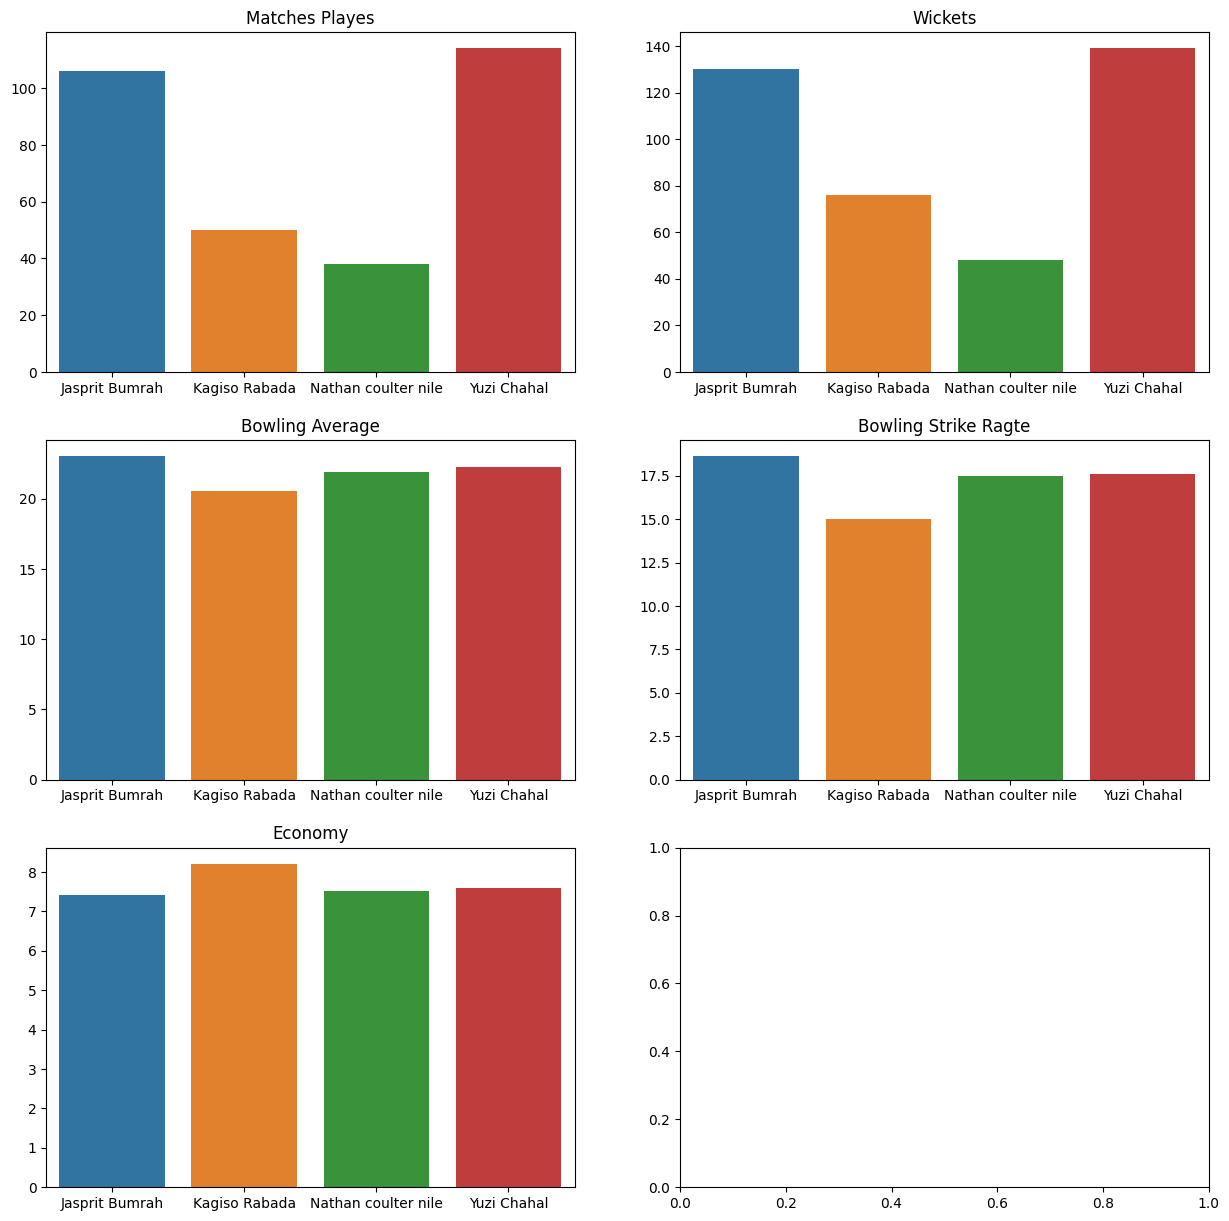

In [ ]:
# Bowlers for the final 11 - Jasprit Bumrah,Kagiso Rabada,Nathan coulter nilte,yuzi chahal

top_bowlers.reset_index(drop=True)
matches_values=[top_bowlers.iloc[10]['Matches_Played'],top_bowlers.iloc[0]['Matches_Played'],top_bowlers.iloc[7]['Matches_Played'],top_bowlers.iloc[1]['Matches_Played']]
wickets_values=[top_bowlers.iloc[10]['Wickets'],top_bowlers.iloc[0]['Wickets'],top_bowlers.iloc[7]['Wickets'],top_bowlers.iloc[1]['Wickets']]
bowling_average_values=[top_bowlers.iloc[10]['Bowling_average'],top_bowlers.iloc[0]['Bowling_average'],top_bowlers.iloc[7]['Bowling_average'],top_bowlers.iloc[1]['Bowling_average']]
bowling_strike_rate_values=[top_bowlers.iloc[10]['Bowling_Strike_Rate'],top_bowlers.iloc[0]['Bowling_Strike_Rate'],top_bowlers.iloc[7]['Bowling_Strike_Rate'],top_bowlers.iloc[1]['Bowling_Strike_Rate']]
economy_values=[top_bowlers.iloc[10]['Economy'],top_bowlers.iloc[0]['Economy'],top_bowlers.iloc[7]['Economy'],top_bowlers.iloc[1]['Economy']]

labels=['Jasprit Bumrah','Kagiso Rabada','Nathan coulter nile','Yuzi Chahal']

fig,axes=plt.subplots(3,2,figsize=(15,15))
axes[0][0].set_title("Matches Playes")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Ragte")
axes[2][0].set_title("Economy")

sns.barplot(x=labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=labels,y=wickets_values,ax=axes[0][1])
sns.barplot(x=labels,y=bowling_average_values,ax=axes[1][0])
sns.barplot(x=labels,y=bowling_strike_rate_values,ax=axes[1][1])
sns.barplot(x=labels,y=economy_values,ax=axes[2][0])

## Result of Analysis
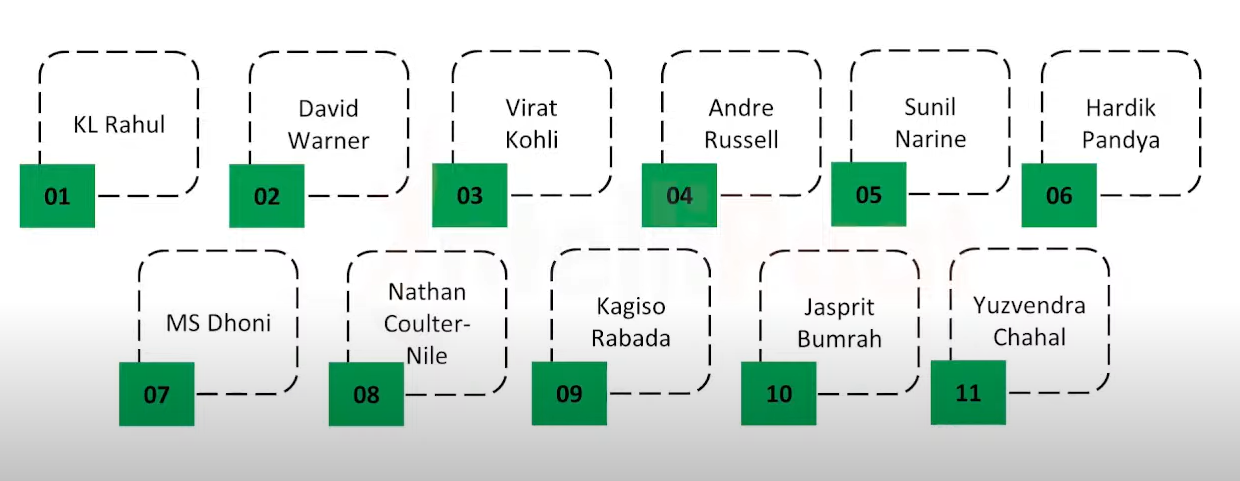